# My Perceptron

## How the Perceptron Works
The perceptron is one of the simplest artificial neural network models, designed for binary classification. It works by receiving multiple inputs, applying weights to each of them, summing these values with a bias term, and passing the result through an activation function (typically a step function) to produce a binary output (0 or 1). During training, the algorithm iteratively adjusts the weights and bias using a simple learning rule: for each misclassification, the parameters are updated proportionally to the learning rate and the magnitude of the error. This process allows the perceptron to gradually learn a linear decision boundary that separates the data into two classes.

## Perceptron Class

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10, verbose=True):
        """Initialize the Perceptron with given parameters
        
        Args:
            learning_rate (float): Step size for weight updates (default: 0.1)
            epochs (int): Number of training iterations (default: 10)
            verbose (bool): Whether to print training progress (default: True)
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.verbose = verbose
        self.history = []
    
    def __str__(self):
        """String representation of the Perceptron"""
        return (f"Perceptron(learning_rate={self.learning_rate}, epochs={self.epochs})\n"
                f"Weights: {self.weights}\n"
                f"Bias: {self.bias}")
    
    @staticmethod
    def activation_function(x):
        """Step activation function
        
        Args:
            x (float): Input value
            
        Returns:
            int: 1 if x >= 0, else 0
        """
        return 1 if x >= 0 else 0
    
    def _log(self, message, separator=False):
        """Internal logging method
        
        Args:
            message (str): Message to print
            separator (bool): Whether to print a separator line
        """
        if self.verbose:
            if separator:
                print(50 * "-")
            print(message)
    
    def fit(self, X, y):
        """Train the perceptron on given data
        
        Args:
            X (ndarray): Input features (n_samples, n_features)
            y (ndarray): Target values (n_samples,)
            
        Returns:
            self: Returns the instance itself
        """
        # Initialize weights and bias with small random values
        self.weights = np.random.rand(X.shape[1]) * 0.01
        self.bias = np.random.rand() * 0.01
        
        self._log("\nStarting Perceptron training")
        self._log(f"Learning rate: {self.learning_rate}")
        self._log(f"Number of epochs: {self.epochs}")
        self._log("", separator=True)
        
        for epoch in range(self.epochs):
            epoch_errors = 0
            self._log(f"\nEpoch {epoch + 1}/{self.epochs}")
            
            for i in range(len(X)):
                # Forward pass
                score = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation_function(score)
                error = y[i] - y_pred
                epoch_errors += int(error != 0)
                
                if self.verbose:
                    self._log(f"\nSample {i+1}: {X[i]} → Expected: {y[i]}, Predicted: {y_pred}")
                    self._log(f"Weights: {self.weights}, Bias: {self.bias}")
                    self._log(f"Error: {error}")
                
                # Weight update
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
                
                if self.verbose:
                    self._log(f"Updated weights: {self.weights}, Updated bias: {self.bias}")
                    self._log("", separator=True)

            # Store training history
            self.history.append({
                'epoch': epoch + 1,
                'weights': np.copy(self.weights),
                'bias': self.bias,
                'errors': epoch_errors
            })
            
            self._log(f"Errors in epoch {epoch + 1}: {epoch_errors}")
        
        self._log("\nTraining completed!", separator=True)
        return self
    
    def predict(self, X):
        """Make predictions on new data
        
        Args:
            X (ndarray): Input features (n_samples, n_features)
            
        Returns:
            ndarray: Predicted class labels (n_samples,)
        """
        return np.array([self.activation_function(np.dot(x, self.weights) + self.bias) for x in X])
    
    def get_history_df(self):
        """Get training history as DataFrame
        
        Returns:
            DataFrame: Contains epoch-by-epoch training metrics
        """
        return pd.DataFrame(self.history)
    
    def plot_decision_boundary(self, X, y, title="Decision Boundary"):
        """Plot the data points and decision boundary
        
        Args:
            X (ndarray): Input features (n_samples, 2)
            y (ndarray): Target values (n_samples,)
            title (str): Plot title (default: "Decision Boundary")
            
        Raises:
            ValueError: If input is not 2-dimensional
        """
        if X.shape[1] != 2:
            raise ValueError("Visualization only supports 2D data")
        
        # Configure plot
        plt.figure(figsize=(8, 6))
        
        # Plot data points
        for i, (x1, x2) in enumerate(X):
            if y[i] == 0:
                plt.scatter(x1, x2, color='red', label='False' if i == 0 else "")
            else:
                plt.scatter(x1, x2, color='blue', label='True' if i == 1 else "")
        
        # Calculate decision boundary
        x_values = np.linspace(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, 100)
        if self.weights[1] != 0:  # Avoid division by zero
            y_values = -(self.weights[0] * x_values + self.bias) / self.weights[1]
            plt.plot(x_values, y_values, color='green', label='Decision Boundary')
        else:
            plt.axvline(x=-self.bias/self.weights[0], color='green', label='Decision Boundary')
        
        # Configure plot appearance
        plt.title(title)
        plt.xlabel("Input X1")
        plt.ylabel("Input X2")
        plt.legend()
        plt.grid(True)
        
        # Set axis limits
        plt.xlim(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5)
        plt.ylim(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5)
        
        plt.show()

### Learn

Perceptron(learning_rate=0.1, epochs=10)
Weights: None
Bias: None

Starting Perceptron training
Learning rate: 0.1
Number of epochs: 10
--------------------------------------------------


Epoch 1/10

Sample 1: [0 0] → Expected: 0, Predicted: 1
Weights: [0.00423425 0.00527393], Bias: 1.5292081912290368e-05
Error: -1
Updated weights: [0.00423425 0.00527393], Updated bias: -0.09998470791808771
--------------------------------------------------


Sample 2: [0 1] → Expected: 1, Predicted: 0
Weights: [0.00423425 0.00527393], Bias: -0.09998470791808771
Error: 1
Updated weights: [0.00423425 0.10527393], Updated bias: 1.5292081912296474e-05
--------------------------------------------------


Sample 3: [1 0] → Expected: 1, Predicted: 1
Weights: [0.00423425 0.10527393], Bias: 1.5292081912296474e-05
Error: 0
Updated weights: [0.00423425 0.10527393], Updated bias: 1.5292081912296474e-05
--------------------------------------------------


Sample 4: [1 1] → Expected: 1, Predicted: 1
Weights: [0.00

,epoch,weights,bias,errors
0,1,"[0.004234246546266916, 0.1052739342932619]",0.000015,2
1,2,"[0.10423424654626692, 0.1052739342932619]",0.000015,2
2,3,"[0.10423424654626692, 0.1052739342932619]",-0.099985,1
3,4,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
4,5,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
5,6,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
6,7,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
7,8,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
8,9,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0
9,10,"[0.10423424654626692, 0.1052739342932619]",-0.099985,0



Final predictions:


,X1,X2,Actual,Predicted
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,1


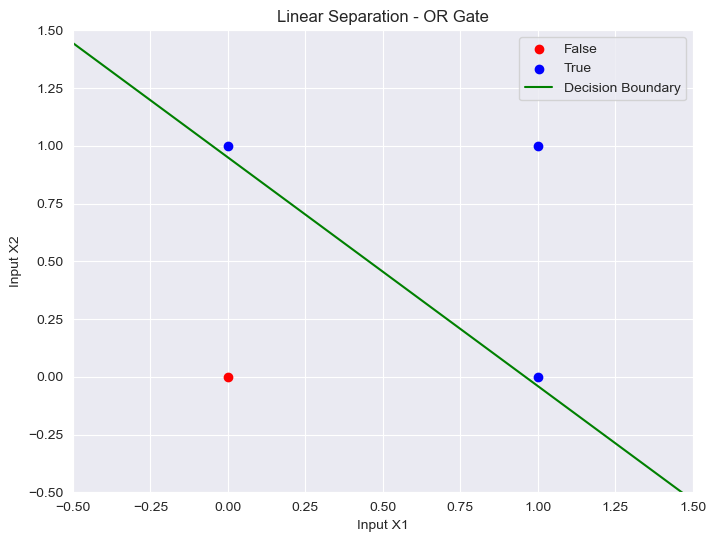

In [22]:
# OR logic gate
x_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create perceptron
perceptron_or = Perceptron(learning_rate=0.1, epochs=10)
print(perceptron_or) 

# Train perceptron
perceptron_or.fit(x_or, y_or)

# Results
print("\nFinal summary:")
print(perceptron_or)

# Training history
history_df = perceptron_or.get_history_df()
print("\nTraining history:")
display(history_df)
    
# Predictions
predictions = perceptron_or.predict(x_or)
print("\nFinal predictions:")
results = pd.DataFrame(x_or, columns=['X1', 'X2'])
results['Actual'] = y_or
results['Predicted'] = predictions
display(results)
    
# Plot decision boundary
perceptron_or.plot_decision_boundary(x_or, y_or, title="Linear Separation - OR Gate")

### Learn AND

Perceptron(learning_rate=0.1, epochs=10)
Weights: None
Bias: None

Starting Perceptron training
Learning rate: 0.1
Number of epochs: 10
--------------------------------------------------


Epoch 1/10

Sample 1: [0 0] → Expected: 0, Predicted: 1
Weights: [0.00062207 0.00928145], Bias: 0.00686251792417744
Error: -1
Updated weights: [0.00062207 0.00928145], Updated bias: -0.09313748207582256
--------------------------------------------------


Sample 2: [0 1] → Expected: 0, Predicted: 0
Weights: [0.00062207 0.00928145], Bias: -0.09313748207582256
Error: 0
Updated weights: [0.00062207 0.00928145], Updated bias: -0.09313748207582256
--------------------------------------------------


Sample 3: [1 0] → Expected: 0, Predicted: 0
Weights: [0.00062207 0.00928145], Bias: -0.09313748207582256
Error: 0
Updated weights: [0.00062207 0.00928145], Updated bias: -0.09313748207582256
--------------------------------------------------


Sample 4: [1 1] → Expected: 1, Predicted: 0
Weights: [0.00062207 0.

,epoch,weights,bias,errors
0,1,"[0.10062207192956578, 0.10928144804615293]",0.006863,2
1,2,"[0.20062207192956577, 0.10928144804615293]",-0.093137,3
2,3,"[0.20062207192956577, 0.10928144804615293]",-0.193137,3
3,4,"[0.20062207192956577, 0.20928144804615295]",-0.193137,2
4,5,"[0.20062207192956577, 0.10928144804615295]",-0.293137,1
5,6,"[0.20062207192956577, 0.10928144804615295]",-0.293137,0
6,7,"[0.20062207192956577, 0.10928144804615295]",-0.293137,0
7,8,"[0.20062207192956577, 0.10928144804615295]",-0.293137,0
8,9,"[0.20062207192956577, 0.10928144804615295]",-0.293137,0
9,10,"[0.20062207192956577, 0.10928144804615295]",-0.293137,0



Final predictions:


,X1,X2,Actual,Predicted
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


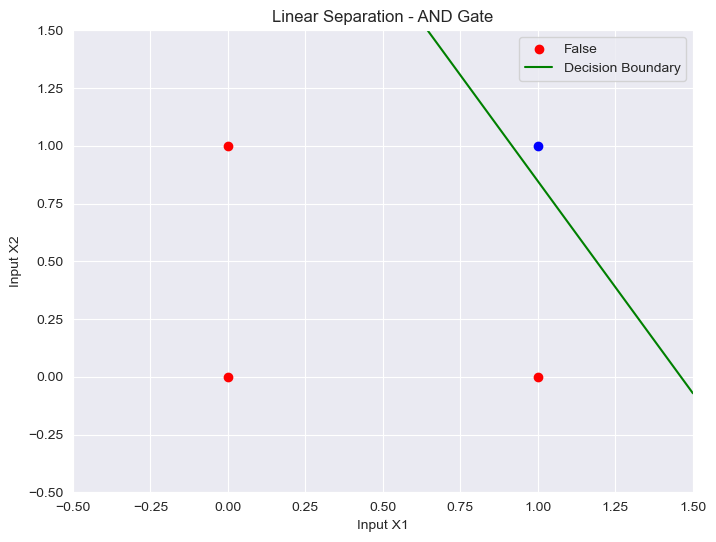

In [23]:
# AND logic gate
x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create perceptron
perceptron_and = Perceptron(learning_rate=0.1, epochs=10)
print(perceptron_and) 

# Train perceptron
perceptron_and.fit(x_and, y_and)

# Results
print("\nFinal summary:")
print(perceptron_and)

# Training history
history_df = perceptron_and.get_history_df()
print("\nTraining history:")
display(history_df)
    
# Predictions
predictions = perceptron_and.predict(x_and)
print("\nFinal predictions:")
results = pd.DataFrame(x_and, columns=['X1', 'X2'])
results['Actual'] = y_and
results['Predicted'] = predictions
display(results)
    
# Plot decision boundary
perceptron_and.plot_decision_boundary(x_and, y_and, title="Linear Separation - AND Gate")

### Learn XOR


Perceptron(learning_rate=0.1, epochs=10)
Weights: None
Bias: None

Starting Perceptron training
Learning rate: 0.1
Number of epochs: 10
--------------------------------------------------


Epoch 1/10

Sample 1: [0 0] → Expected: 0, Predicted: 1
Weights: [0.00063899 0.00773462], Bias: 0.001617992436182758
Error: -1
Updated weights: [0.00063899 0.00773462], Updated bias: -0.09838200756381725
--------------------------------------------------


Sample 2: [0 1] → Expected: 1, Predicted: 0
Weights: [0.00063899 0.00773462], Bias: -0.09838200756381725
Error: 1
Updated weights: [0.00063899 0.10773462], Updated bias: 0.0016179924361827552
--------------------------------------------------


Sample 3: [1 0] → Expected: 1, Predicted: 1
Weights: [0.00063899 0.10773462], Bias: 0.0016179924361827552
Error: 0
Updated weights: [0.00063899 0.10773462], Updated bias: 0.0016179924361827552
--------------------------------------------------


Sample 4: [1 1] → Expected: 0, Predicted: 1
Weights: [0.0006389

,epoch,weights,bias,errors
0,1,"[-0.09936100991610727, 0.007734619785339042]",-0.098382,3
1,2,"[-0.09936100991610727, 0.007734619785339042]",0.001618,3
2,3,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
3,4,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
4,5,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
5,6,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
6,7,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
7,8,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
8,9,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4
9,10,"[-0.09936100991610727, 0.007734619785339042]",0.001618,4



Final predictions:


,X1,X2,Actual,Predicted
0,0,0,0,1
1,0,1,1,1
2,1,0,1,0
3,1,1,0,0


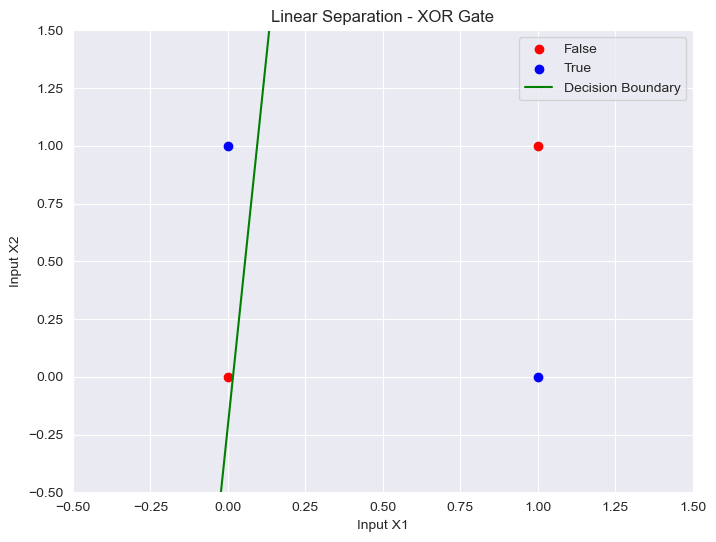

In [24]:
# XOR logic gate
x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create perceptron
perceptron_xor = Perceptron(learning_rate=0.1, epochs=10)
print(perceptron_xor) 

# Train perceptron
perceptron_xor.fit(x_xor, y_xor)

# Results
print("\nFinal summary:")
print(perceptron_xor)

# Training history
history_df = perceptron_xor.get_history_df()
print("\nTraining history:")
display(history_df)
    
# Predictions
predictions = perceptron_xor.predict(x_xor)
print("\nFinal predictions:")
results = pd.DataFrame(x_xor, columns=['X1', 'X2'])
results['Actual'] = y_xor
results['Predicted'] = predictions
display(results)
    
# Plot decision boundary
perceptron_xor.plot_decision_boundary(x_xor, y_xor, title="Linear Separation - XOR Gate")

## Results and Limitations of the Perceptron
The experiments demonstrated that the perceptron successfully learned the AND and OR logic gates because these are linearly separable problems—there exists a straight line in the feature space that can perfectly divide the output classes. However, the perceptron failed to learn the XOR gate, which requires a non-linear decision boundary. This fundamental limitation occurs because XOR is not linearly separable; its points of the same class are arranged in opposite diagonals in 2D space, making it impossible to separate them with a single straight line.

This historical insight was crucial in the development of more complex multi-layer neural networks, which can learn non-linear relationships by combining multiple decision boundaries. The perceptron’s inability to solve XOR motivated advancements in deep learning, leading to models capable of handling more intricate patterns.
